In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("/Users/rsaba/Desktop/Muesli-Project/Working_File_Ragu/Log_final_worksheet.csv")

In [6]:
df.shape


(333, 34)

In [7]:
df.head()

,Index,Order ID,Order Date_x,Ship Mode_x,Customer ID,Customer Name_x,Origin Channel,Country/Region,City,State,...,Ship Mode_y,Ready to Ship Date,Pickup Date,delivery_time_days,total_delivery_time_days,order_Month,Order_YearMonth,order_weekday,on_truck_weekday,warehouse_time_days
0,252,CA-2019-145625,2019-09-11,Standard Class,KC-16540,Kelly Collister,Email,United States,San Diego,California,...,Standard Processing,2019-09-17,2019-09-18,5,12,September,2019-09,Wednesday,Wednesday,7
1,325,CA-2019-162138,2019-04-23,Standard Class,GK-14620,Grace Kelly,Sales,United States,Hesperia,California,...,Standard Processing,NaN,NaN,5,13,April,2019-04,Tuesday,Wednesday,8
2,494,CA-2019-169166,2019-05-09,Standard Class,SS-20590,Sonia Sunley,Email,United States,Seattle,Washington,...,Standard Processing,NaN,NaN,5,11,May,2019-05,Thursday,Wednesday,6
3,734,CA-2020-131954,2020-01-21,Standard Class,DS-13030,Darrin Sayre,Facebook,United States,Seattle,Washington,...,Standard Processing,NaN,NaN,5,13,January,2020-01,Tuesday,Wednesday,8
4,1042,CA-2019-102981,2019-09-06,Second Class,MO-17500,Mary O'Rourke,Email,United States,New York City,New York,...,Standard Processing,2019-09-09,2019-09-11,5,10,September,2019-09,Friday,Wednesday,5


In [8]:
df.columns

Index(['Index', 'Order ID', 'Order Date_x', 'Ship Mode_x', 'Customer ID',
       'Customer Name_x', 'Origin Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Arrival Scan Date',
       'Customer Name_y', 'Row ID', 'Order Date_y', 'On Truck Scan Date',
       'Ship Mode_y', 'Ready to Ship Date', 'Pickup Date',
       'delivery_time_days', 'total_delivery_time_days', 'order_Month',
       'Order_YearMonth', 'order_weekday', 'on_truck_weekday',
       'warehouse_time_days'],
      dtype='object')

In [9]:
df.columns = ['Index', 'Order ID', 'Order Date', 'Ship Mode_x', 'Customer ID',
       'Customer Name_x', 'Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Arrival Scan Date',
       'Customer Name_y', 'Row ID', 'Order Date_y', 'On Truck Scan Date',
       'Shipping Typ', 'Ready to Ship Date', 'Pickup Date',
       'truck_to_cutomer_days', 'total_delivery_time_days', 'order_Month', 'order_weekday',
       'on_truck_weekday','Order_YearMonth','warehouse_time_days']

In [10]:
df.describe()

,Index,Postal Code,Sales,Quantity,Discount,Profit,Row ID,truck_to_cutomer_days,total_delivery_time_days,warehouse_time_days
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,5040.252252,57633.351351,283.551483,3.852853,0.149850,54.382263,5039.813814,4.603604,10.834835,6.231231
std,2982.085412,31836.257226,1087.013436,2.348923,0.210081,535.007277,2982.101446,1.199492,2.862257,2.553757
min,1.000000,1752.000000,0.556000,1.000000,0.000000,-3399.980000,1.000000,1.000000,3.000000,0.000000
25%,2409.000000,31088.000000,15.624000,2.000000,0.000000,2.440200,2408.000000,4.000000,9.000000,5.000000
50%,5163.000000,60653.000000,51.712000,3.000000,0.000000,9.816000,5163.000000,5.000000,11.000000,7.000000
75%,7725.000000,90032.000000,194.352000,5.000000,0.200000,29.985000,7725.000000,5.000000,13.000000,8.000000
max,9987.000000,98270.000000,17499.950000,13.000000,0.800000,8399.976000,9987.000000,7.000000,17.000000,12.000000


In [11]:
#Beladung zu Liefertag
df.groupby("on_truck_weekday")["truck_to_cutomer_days"].agg(["count","mean","median","min","max"])

,count,mean,median,min,max
on_truck_weekday,,,,,
Friday,37,4.918919,5.0,2,7
Monday,53,4.943396,5.0,2,7
Saturday,6,4.166667,4.0,2,7
Sunday,66,4.151515,4.0,1,7
Thursday,63,4.619048,5.0,2,7
Tuesday,59,4.593220,5.0,1,6
Wednesday,49,4.653061,5.0,3,7


In [12]:
#Beladung zu Liefermonat
df.groupby("order_Month")["truck_to_cutomer_days"].agg(["count","mean","median","min","max"])

,count,mean,median,min,max
order_Month,,,,,
April,26,5.000000,5.0,2,7
August,6,5.333333,5.0,3,7
December,38,4.157895,4.0,2,7
February,8,5.250000,5.0,3,7
January,14,4.142857,5.0,1,6
March,19,4.684211,5.0,3,7
May,68,4.529412,5.0,2,7
November,51,4.588235,5.0,2,7
October,38,4.763158,5.0,2,7


In [13]:
#Bestellung nach Wochentag und wieviele Tage es braucht vom Truck zum Kunden.
df.groupby("order_weekday")["truck_to_cutomer_days"].agg(["count","mean","median","min","max"])

,count,mean,median,min,max
order_weekday,,,,,
2019-04,17,4.941176,5.0,2,7
2019-05,65,4.646154,5.0,2,7
2019-08,6,5.333333,5.0,3,7
2019-09,65,4.630769,5.0,1,7
2019-10,38,4.763158,5.0,2,7
2019-11,51,4.588235,5.0,2,7
2019-12,38,4.157895,4.0,2,7
2020-01,14,4.142857,5.0,1,6
2020-02,8,5.250000,5.0,3,7


In [14]:
#Anteile der Kunden nach Shipping Typ
df["Shipping Typ"].value_counts(normalize=True) * 100

Shipping Typ
Standard Processing    77.477477
Express                22.522523
Name: proportion, dtype: float64

In [15]:
#Wie verhält sich die Truck zu Kunden Zeit nach Shipping Typ.
df_pivot = pd.pivot_table(
    df,
    values="truck_to_cutomer_days",
    index="Shipping Typ",   # oder "Ship Mode_y"
    aggfunc=["mean", "median"]
).round(2)

print(df_pivot)

                                     mean                median
                    truck_to_cutomer_days truck_to_cutomer_days
Shipping Typ                                                   
Express                              4.48                   5.0
Standard Processing                  4.64                   5.0


In [16]:
#Wie verhält sich die Order Datum zu Kunden Zeit nach Shipping Typ.
df_pivot = pd.pivot_table(
    df,
    values="total_delivery_time_days",
    index="Shipping Typ",   
    aggfunc=["mean", "median"]
).round(2)

print(df_pivot)

                                        mean                   median
                    total_delivery_time_days total_delivery_time_days
Shipping Typ                                                         
Express                                 7.05                      7.0
Standard Processing                    11.93                     12.0


In [17]:
##Wie verhält sich die Order Datum Lieferzeit zu Kunden Zeit nach Shipping Typ und Wochentagen.
pivot = pd.pivot_table(
    df,
    index="Shipping Typ",         # Zeilen: Versandarten
    columns="order_weekday",     # Spalten: Wochentage
    values="total_delivery_time_days", # Wert: Lieferdauer
    aggfunc=["mean", "median"]   # Aggregationen
)

pivot.round(2) 

mean                                                  \
order_weekday       2019-04 2019-05 2019-08 2019-09 2019-10 2019-11 2019-12   
Shipping Typ                                                                  
Express                9.00    6.74    13.0    7.27    7.00    7.54    7.22   
Standard Processing   12.87   11.91    13.2   11.52   12.24   12.08   12.03   

                                             ...  median                  \
order_weekday       2020-01 2020-02 2020-03  ... 2019-08 2019-09 2019-10   
Shipping Typ                                 ...                           
Express                 NaN    7.00    5.83  ...    13.0     7.0     7.0   
Standard Processing   11.64   12.14   11.46  ...    13.0    12.0    12.0   

                                                                             
order_weekday       2019-11 2019-12 2020-01 2020-02 2020-03 2020-04 2020-05  
Shipping Typ                                                                 
Express                 7.0     7.0     NaN     7.0     6.0     6.0     4.0  
Standard Processing    12.0    12.0    12.0    13.0    12.0    13.0     7.5  

[2 rows x 24 columns]

In [18]:
#Wie verhält sich 
df['Order Date'] = pd.to_datetime(df['Order Date'])


df['Order_YearMonth'] = df['Order Date'].dt.to_period('M')


summary = df.groupby('Order_YearMonth').agg(
    mean_delivery=('total_delivery_time_days', 'mean'),
    median_delivery=('total_delivery_time_days', 'median'),
    unique_orderID=('Order ID', 'nunique')
).reset_index()


summary = summary.sort_values('Order_YearMonth').round(0)
summary


,Order_YearMonth,mean_delivery,median_delivery,unique_orderID
0,2019-04,12.0,13.0,17
1,2019-05,10.0,11.0,65
2,2019-08,13.0,13.0,6
3,2019-09,11.0,11.0,65
4,2019-10,11.0,12.0,38
5,2019-11,11.0,11.0,51
6,2019-12,11.0,12.0,38
7,2020-01,12.0,12.0,14
8,2020-02,12.0,12.0,8
9,2020-03,10.0,10.0,19


In [19]:
##Wie verhält sich die Order Datum Lieferzeit zu Kunden Zeit nach Region
pivot = pd.pivot_table(
    df,
    index="Region",         # Zeilen: Versandarten
    #columns="order_weekday",     # Spalten: Wochentage
    values="total_delivery_time_days", # Wert: Lieferdauer
    aggfunc=["mean", "median"]   # Aggregationen
)

pivot.round(2) 

,mean,median
,total_delivery_time_days,total_delivery_time_days
Region,,
Central,10.16,11.0
East,10.73,11.0
South,11.18,12.0
West,11.23,12.0


In [20]:
##Wie verhält sich die OrderTruck Datum Lieferzeit zu Kunden Zeit nach Region
pivot = pd.pivot_table(
    df,
    index="Region",         # Zeilen: Versandarten
    #columns="order_weekday",     # Spalten: Wochentage
    values="truck_to_cutomer_days", # Wert: Lieferdauer
    aggfunc=["mean", "median"]   # Aggregationen
)

pivot.round(2) 

,mean,median
,truck_to_cutomer_days,truck_to_cutomer_days
Region,,
Central,4.49,5.0
East,4.58,5.0
South,4.61,5.0
West,4.70,5.0


In [21]:
##Wie verhält sich die OrderTruck Datum Lieferzeit zu Kunden Zeit nach Channel
pivot = pd.pivot_table(
    df,
    index="Channel",         # Zeilen: Versandarten
    #columns="order_weekday",     # Spalten: Wochentage
    values="truck_to_cutomer_days", # Wert: Lieferdauer
    aggfunc=["mean", "median"]   # Aggregationen
)
pivot.round(2) 

,mean,median
,truck_to_cutomer_days,truck_to_cutomer_days
Channel,,
Email,4.61,5.0
Facebook,4.83,5.0
Sales,4.47,5.0


In [22]:
##Wie verhält sich die Order Datum Lieferzeit zu Kunden Zeit nach Channel
pivot = pd.pivot_table(
    df,
    index="Channel",         # Zeilen: Versandarten
    #columns="order_weekday",     # Spalten: Wochentage
    values="total_delivery_time_days", # Wert: Lieferdauer
    aggfunc=["mean", "median"]   # Aggregationen
)

pivot.round(2) 

,mean,median
,total_delivery_time_days,total_delivery_time_days
Channel,,
Email,10.62,11.0
Facebook,11.35,11.5
Sales,10.94,11.0


In [23]:
summary_stats = df[['truck_to_cutomer_days', 'warehouse_time_days','total_delivery_time_days']].agg(['mean','median']).round(2)
summary_stats

,truck_to_cutomer_days,warehouse_time_days,total_delivery_time_days
mean,4.6,6.23,10.83
median,5.0,7.00,11.00


In [24]:
agg_sum = df[['truck_to_cutomer_days', 'warehouse_time_days', 'total_delivery_time_days']].sum()
agg_sum


percentages = (agg_sum[['truck_to_cutomer_days', 'warehouse_time_days']] 
               / agg_sum['total_delivery_time_days'] * 100).round(2)

percentages

truck_to_cutomer_days    42.49
warehouse_time_days      57.51
dtype: float64

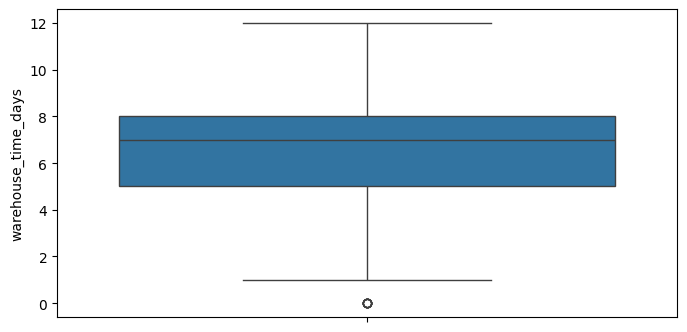

In [25]:
plt.subplots(figsize = (8,4))

sns.boxplot(x = None, y='warehouse_time_days', data=df);

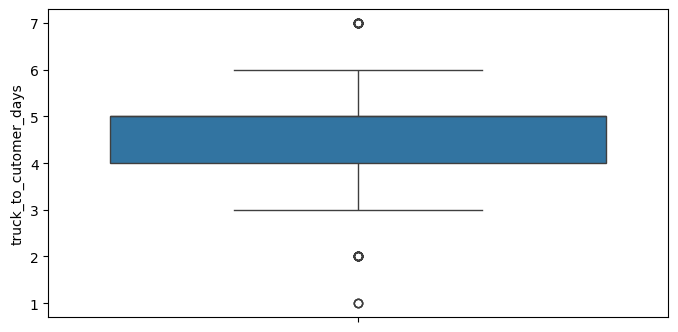

In [26]:
plt.subplots(figsize = (8,4))

sns.boxplot(x = None, y='truck_to_cutomer_days', data=df);

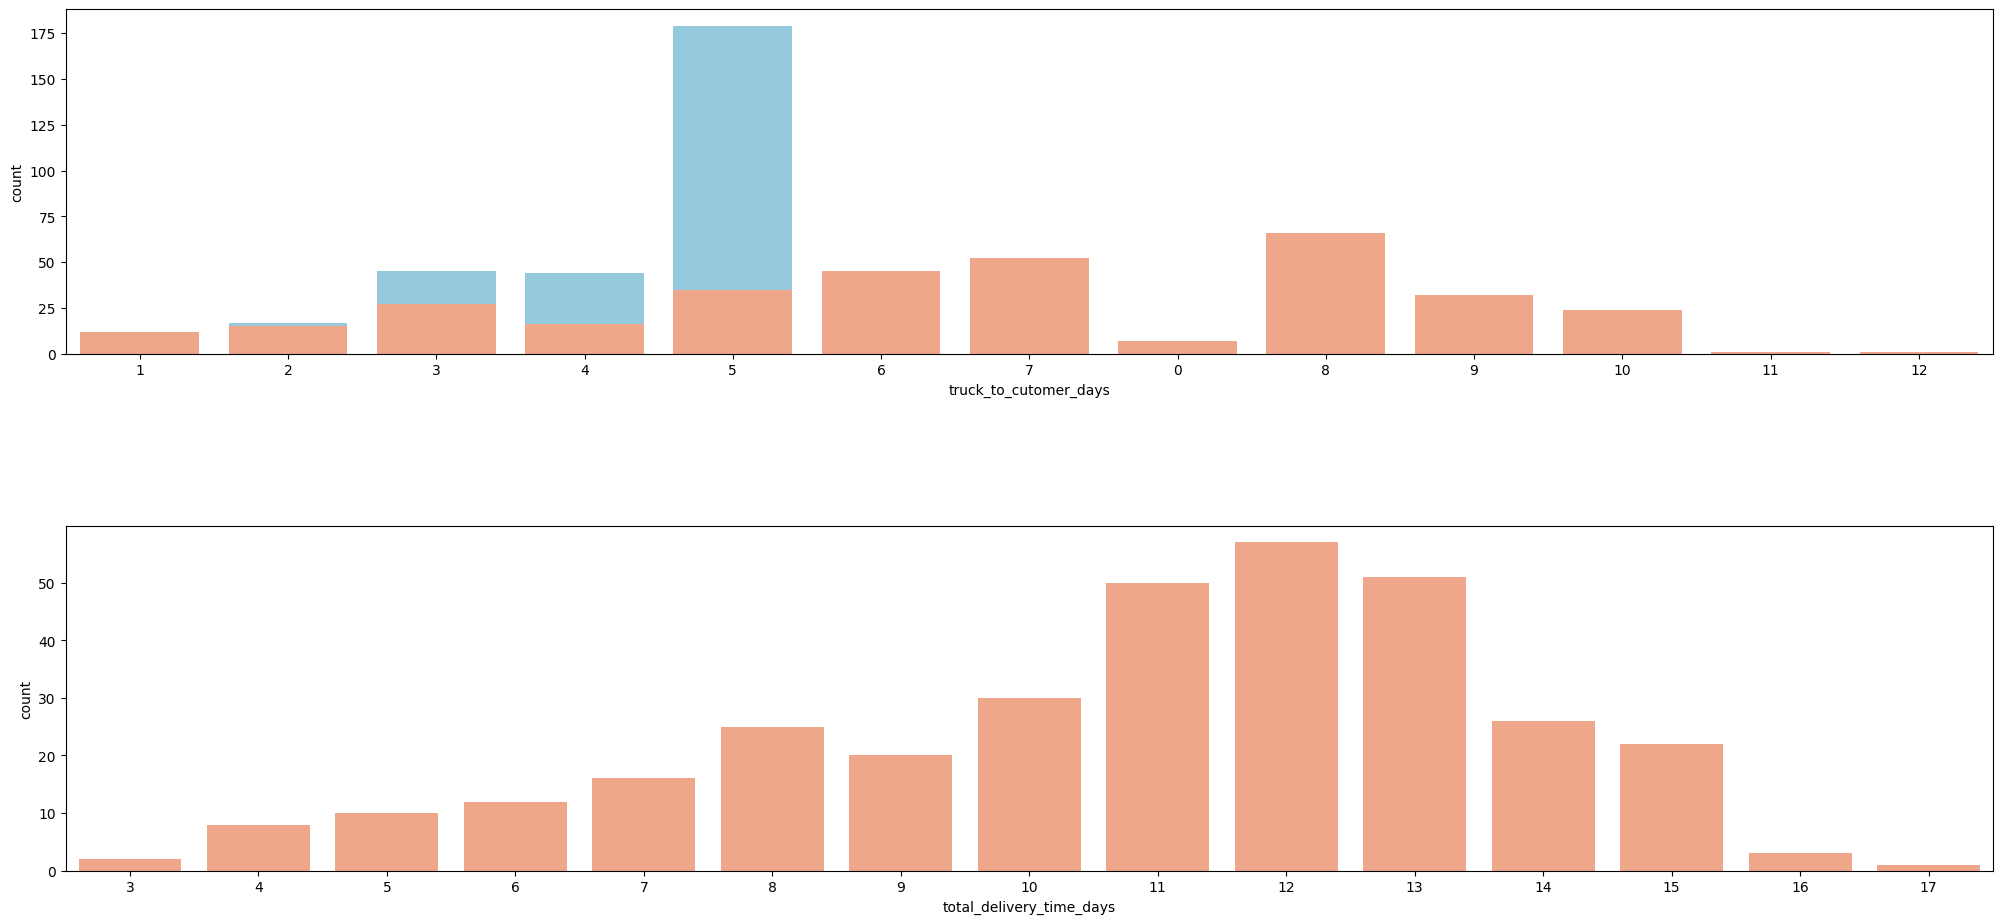

In [27]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
#plt.suptitle('Video publication time', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df['truck_to_cutomer_days'], ax=ax[0], color='skyblue' )
#f1.set_ylabel("No of published videos", fontsize = 10)
#f1.set_xlabel("Weekday of publication", fontsize = 10)
#f1.set_xticks([0,1,2,3,4,5,6])
#f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#f1.set_title("Number of published videos per weekday", fontsize = 15);

f2 = sns.countplot(x=df['total_delivery_time_days'], ax=ax[1], color='lightsalmon')
#f2.set_ylabel("No of published videos", fontsize = 10)
#f2.set_xlabel("Hour of publication", fontsize = 10)
#f2.set_title("Number of published videos per hour", fontsize = 15);

f3 = sns.countplot(x=df['warehouse_time_days'], ax=ax[0], color='lightsalmon')
#f2.set_ylabel("No of published videos", fontsize = 10)
#f2.set_xlabel("Hour of publication", fontsize = 10)
#f2.set_title("Number of published videos per hour", fontsize = 15);



In [28]:
import pandas as pd

# Standardabweichung
std_dev = df['truck_to_cutomer_days'].std()

# Varianz
variance = df['truck_to_cutomer_days'].var()

# Spannweite
range_ = df['truck_to_cutomer_days'].max() - df['truck_to_cutomer_days'].min()

# Interquartilsabstand (IQR)
iqr = df['truck_to_cutomer_days'].quantile(0.75) - df['truck_to_cutomer_days'].quantile(0.25)

print(f"Standardabweichung: {std_dev:.2f}")
print(f"Varianz: {variance:.2f}")
print(f"Spannweite: {range_:.2f}")
print(f"Interquartilsabstand (IQR): {iqr:.2f}")


Standardabweichung: 1.20
Varianz: 1.44
Spannweite: 6.00
Interquartilsabstand (IQR): 1.00


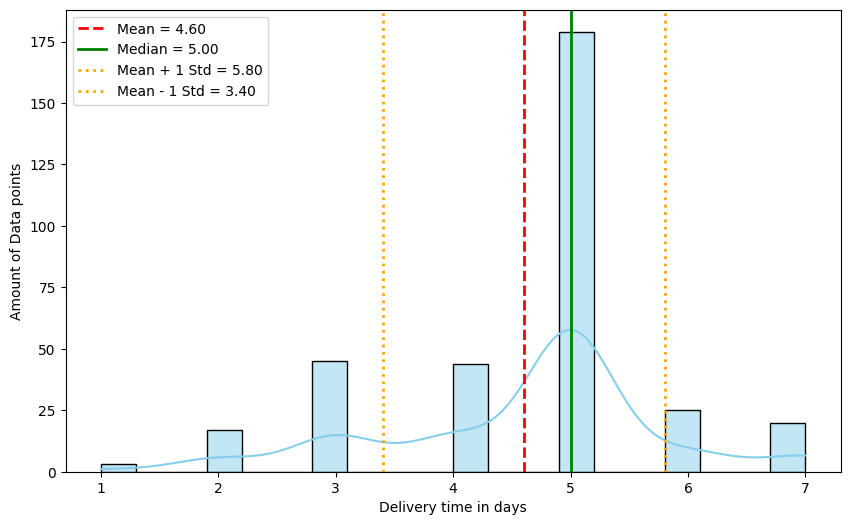

In [33]:
# Kennzahlen berechnen
mean_val = df['truck_to_cutomer_days'].mean()
median_val = df['truck_to_cutomer_days'].median()
std_val = df['truck_to_cutomer_days'].std()

plt.figure(figsize=(10,6))
sns.histplot(
    df['truck_to_cutomer_days'], 
    bins=20, 
    kde=True, 
    color="skyblue",   # Histogramm-Balken in Skyblue
    edgecolor="black"  # optional für bessere Sichtbarkeit
)

# Linien einzeichnen
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median = {median_val:.2f}')
plt.axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=2, label=f'Mean + 1 Std = {mean_val+std_val:.2f}')
plt.axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=2, label=f'Mean - 1 Std = {mean_val-std_val:.2f}')

# Titel & Legende
#plt.title("Histogram: Truck to ")
plt.xlabel("Delivery time in days")
plt.ylabel("Amount of Data points")
plt.legend()
plt.show()

In [ ]:
# Wochentag aus order_date ziehen (falls nötig: zuerst in datetime umwandeln)
df['order_date'] = pd.to_datetime(df['order_date'])
df['weekday'] = df['order_date'].dt.day_name()  # oder .dt.weekday für 0-6

# Gruppieren: Durchschnittliche Lieferzeit pro Wochentag
weekday_delivery = df.groupby('weekday')['truck_to_cutomer_days'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Balkendiagramm plotten
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_delivery.index, y=weekday_delivery.values, color="skyblue", edgecolor="black")

plt.title("Durchschnittliche Lieferzeit nach Wochentagen")
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittliche Lieferzeit (Tage)")
plt.xticks(rotation=45)
plt.show()

In [34]:
df.columns

Index(['Index', 'Order ID', 'Order Date', 'Ship Mode_x', 'Customer ID',
       'Customer Name_x', 'Channel', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Category', 'Sub-Category', 'Product ID',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Arrival Scan Date',
       'Customer Name_y', 'Row ID', 'Order Date_y', 'On Truck Scan Date',
       'Shipping Typ', 'Ready to Ship Date', 'Pickup Date',
       'truck_to_cutomer_days', 'total_delivery_time_days', 'order_Month',
       'order_weekday', 'on_truck_weekday', 'Order_YearMonth',
       'warehouse_time_days'],
      dtype='object')

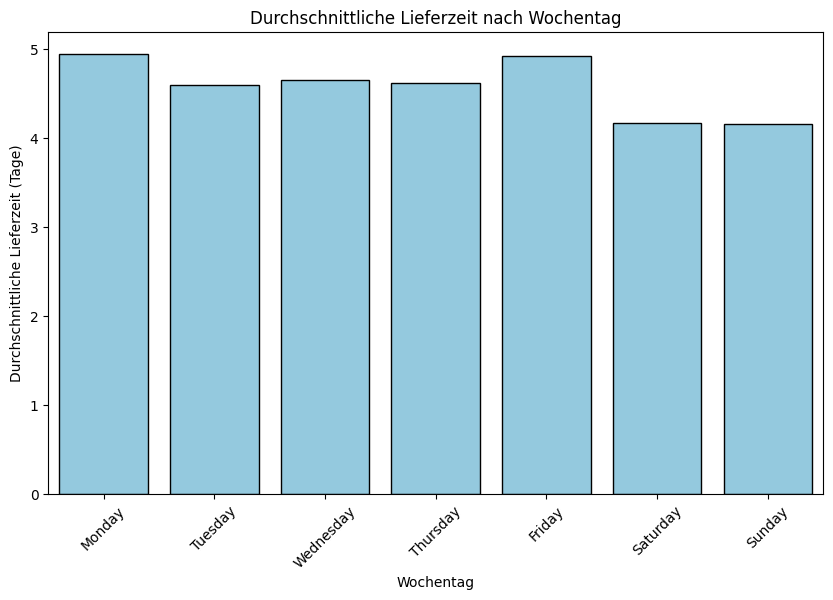

In [35]:
weekday_avg = df.groupby('on_truck_weekday')['truck_to_cutomer_days'].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10,6))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, color="skyblue", edgecolor="black")

plt.title("Durchschnittliche Lieferzeit nach Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittliche Lieferzeit (Tage)")
plt.xticks(rotation=45)
plt.show()
